In [1]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Data Ingestions step
data=pd.read_csv('data/adult_cleandata.csv')
data.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0


In [3]:
data.shape

(32537, 13)

In [4]:
# Seprate dependent and independent features
x = data.drop("income",axis=1)
y = data["income"]

In [5]:
numerical_columns=data.columns[data.dtypes!='object']
categorical_columns=data.columns[data.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['age', 'workclass', 'education_num', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'native_country', 'income'],
      dtype='object')
Categorical Columns: Index([], dtype='object')


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
#pipline libraries
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [7]:
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]

)

cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler",StandardScaler())
    ]

)

preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_columns)
])

In [8]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(26029, 12)
(6508, 12)
(26029,)
(6508,)


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report,ConfusionMatrixDisplay

In [11]:
def performance_metrices(test,predict):
    confusionmetrix = print(f"CONFUSION_METRIX: {confusion_matrix(test,predict)}")
    pre = print(f"PRECISION_SCORE: {precision_score(test,predict)}")
    recall = print(f"RECALL_SCORE: {recall_score(test,predict)}")
    f1score = print(f"F1_SCORE: {f1_score(test,predict)}")
    accuracyscore = print(f"ACCURACY_SCORE: {accuracy_score(test,predict)}")
    return confusionmetrix,pre,recall,f1score,accuracyscore

Logistic Regression

In [12]:
logistic = LogisticRegression()

In [13]:
logistic.fit(X_train,y_train)

LogisticRegression()

In [14]:
logistic.score(X_train,y_train)

0.8062929809059126

In [15]:
y_pred = logistic.predict(X_test)

In [16]:
performance_metrices(y_test,y_pred)

CONFUSION_METRIX: [[4637  268]
 [ 973  630]]
PRECISION_SCORE: 0.7015590200445434
RECALL_SCORE: 0.3930131004366812
F1_SCORE: 0.5037984806077568
ACCURACY_SCORE: 0.8093116164720344


(None, None, None, None, None)

Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
RF = RandomForestClassifier()

In [19]:
RF.fit(X_train,y_train)

RandomForestClassifier()

In [20]:
RF.score(X_train,y_train)

0.9782934419301548

In [21]:
y_pred = RF.predict(X_test)

In [22]:
performance_metrices(y_test,y_pred)

CONFUSION_METRIX: [[4535  370]
 [ 593 1010]]
PRECISION_SCORE: 0.7318840579710145
RECALL_SCORE: 0.6300686213349969
F1_SCORE: 0.6771706335903452
ACCURACY_SCORE: 0.8520282728948986


(None, None, None, None, None)

Decision Tree

In [24]:
tree = DecisionTreeClassifier()

In [25]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [26]:
tree.score(X_train,y_train)

0.9782934419301548

In [27]:
y_pred = tree.predict(X_test)

In [28]:
performance_metrices(y_test,y_pred)

CONFUSION_METRIX: [[4304  601]
 [ 625  978]]
PRECISION_SCORE: 0.6193793540215327
RECALL_SCORE: 0.6101060511540861
F1_SCORE: 0.6147077309868009
ACCURACY_SCORE: 0.8116164720344192


(None, None, None, None, None)

Use Hyperparemeter tuning

In [29]:
logistic1 = LogisticRegression()

In [30]:
parameter = {
    "class_weight":["balanced"],
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
    
}

In [31]:
grid = GridSearchCV(estimator=logistic1,param_grid=parameter,cv=5,n_jobs=-1, verbose=3, error_score='raise')

In [32]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, error_score='raise', estimator=LogisticRegression(),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=3)

In [33]:
grid.best_params_

{'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'saga'}

In [34]:
grid.score(X_train,y_train)

0.7808213915248376

In [35]:
y_pred = grid.predict(X_test)

In [36]:
accuracy_score(y_test,y_pred)

0.7758143822987092

In [37]:
tree1 = DecisionTreeClassifier()

In [38]:
param_grid = {
    "class_weight":["balanced"],
    "criterion":['gini',"entropy"],
    "splitter":['best','random'],
    "max_depth":[3,4,5,6],
    "min_samples_split":[2,3,4,5],
    "min_samples_leaf":[1,2,3],
    "max_features":["sqrt","log2"]
}

In [39]:
grid_search = GridSearchCV(estimator=tree1,param_grid=param_grid,cv=5,scoring="accuracy", error_score='raise')

In [40]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise', estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [41]:
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

In [42]:
grid_search.score(X_train,y_train)

0.7592685082023897

In [43]:
y_pred = grid_search.predict(X_test)

In [44]:
accuracy_score(y_test,y_pred)

0.7532267977873387

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.71      0.81      4905
           1       0.50      0.88      0.64      1603

    accuracy                           0.75      6508
   macro avg       0.72      0.80      0.73      6508
weighted avg       0.84      0.75      0.77      6508



In [46]:
forest1 = RandomForestClassifier()

In [47]:
param_grid = {
    "class_weight":["balanced"],
    'n_estimators': [20, 50, 30],
    'max_depth': [10, 8, 5],
    'min_samples_split': [2, 5, 10],
}

In [48]:
grid_search = GridSearchCV(estimator=forest1,param_grid=param_grid,cv=5,scoring="accuracy",error_score='raise')

In [49]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise', estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'], 'max_depth': [10, 8, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 50, 30]},
             scoring='accuracy')

In [51]:
grid_search.best_params_

{'class_weight': 'balanced',
 'max_depth': 10,
 'min_samples_split': 2,
 'n_estimators': 20}

In [52]:
grid_search.score(X_train,y_train)

0.8219678051404203

In [53]:
y_pred = grid_search.predict(X_test)

In [54]:
accuracy_score(y_test,y_pred)

0.8048555623847572

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86      4905
           1       0.57      0.86      0.69      1603

    accuracy                           0.80      6508
   macro avg       0.76      0.82      0.77      6508
weighted avg       0.85      0.80      0.82      6508



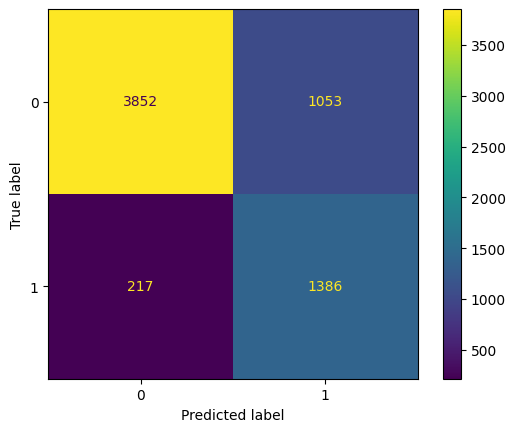

In [56]:
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()